In [2]:
#libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##ML
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler, Normalizer, MaxAbsScaler
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, KFold, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline


##Classifiers
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis


In [3]:
df = pd.read_csv('./breast-cancer-diagnostic.shuf.lrn.csv')

df.set_index('ID', inplace=True)
df.head()

,class,radiusMean,textureMean,perimeterMean,areaMean,smoothnessMean,compactnessMean,concavityMean,concavePointsMean,symmetryMean,...,radiusWorst,textureWorst,perimeterWorst,areaWorst,smoothnessWorst,compactnessWorst,concavityWorst,concavePointsWorst,symmetryWorst,fractalDimensionWorst
ID,,,,,,,,,,,,,,,,,,,,,
8813129,False,13.27,17.02,84.55,546.4,0.08445,0.04994,0.03554,0.024560,0.1496,...,15.14,23.60,98.84,708.8,0.1276,0.1311,0.17860,0.09678,0.2506,0.07623
898678,False,12.06,18.90,76.66,445.3,0.08386,0.05794,0.00751,0.008488,0.1555,...,13.64,27.06,86.54,562.6,0.1289,0.1352,0.04506,0.05093,0.2880,0.08083
917896,False,13.71,18.68,88.73,571.0,0.09916,0.10700,0.05385,0.037830,0.1714,...,15.11,25.63,99.43,701.9,0.1425,0.2566,0.19350,0.12840,0.2849,0.09031
869691,True,11.80,16.58,78.99,432.0,0.10910,0.17000,0.16590,0.074150,0.2678,...,13.74,26.38,91.93,591.7,0.1385,0.4092,0.45040,0.18650,0.5774,0.10300
9110127,True,18.03,16.85,117.50,990.0,0.08947,0.12320,0.10900,0.062540,0.1720,...,20.38,22.02,133.30,1292.0,0.1263,0.2666,0.42900,0.15350,0.2842,0.08225


### Load Data

the data is loaded from the csv and the first lines are displayed. this gives a rough overview of the data. 

[Text(0.5, 1.0, 'Distribution of respons variable')]

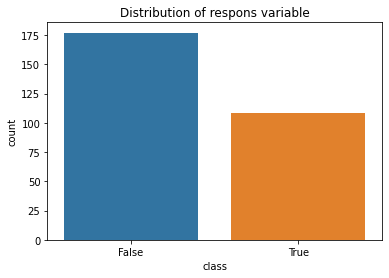

In [4]:
sns.countplot(x='class', data=df).set(title='Distribution of respons variable')

### Representation of the response variables

The classes exhibit an imbalance, and the next step involves addressing this issue.

# Data spliting 

In [5]:
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X, y = sm.fit_resample(df.drop('class', axis=1), df['class'])


print(X.shape)
print(y.shape)


(354, 30)
(354,)


[Text(0.5, 1.0, 'Distribution of respons variable after SMOTE')]

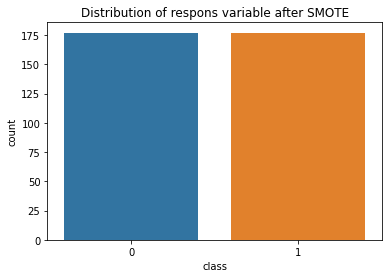

In [6]:
sns.countplot(x=y).set(title='Distribution of respons variable after SMOTE')


The response variables were encoded using binary values and balanced using the SMOTE method.

# Model 


In [7]:
import warnings
warnings.filterwarnings('ignore')

classifiers = [LogisticRegression(), KNeighborsClassifier(), SVC(), LinearSVC(), DecisionTreeClassifier(), RandomForestClassifier(), AdaBoostClassifier(), GradientBoostingClassifier(), GaussianNB(), LinearDiscriminantAnalysis(), QuadraticDiscriminantAnalysis()]

def cv_pipeline(model, X, y, cv=5):
    pipe = Pipeline(steps=[('scaler', StandardScaler()), ('model', model)])
    scores = cross_val_score(pipe, X, y, scoring='f1', cv=cv)
    return (scores)




for clf in classifiers:
        scores = cv_pipeline(clf, X, y, 5)
        print(clf)
        print("Mean: ", scores.mean())
        print("Std: ", scores.std())
        print("")   

LogisticRegression()
Mean:  0.9772946859903382
Std:  0.014601044695369469

KNeighborsClassifier()
Mean:  0.9576523125549512
Std:  0.025416659054730253

SVC()
Mean:  0.9771167635998411
Std:  0.01502179445491849

LinearSVC()
Mean:  0.9689075352197658
Std:  0.010675522051654037

DecisionTreeClassifier()
Mean:  0.9413652653302231
Std:  0.024082267696990362

RandomForestClassifier()
Mean:  0.9555911945517103
Std:  0.015110190693124526

AdaBoostClassifier()
Mean:  0.9652003173742305
Std:  0.021660010078887154

GradientBoostingClassifier()
Mean:  0.9516347794497844
Std:  0.023082903492025235

GaussianNB()
Mean:  0.9398172807584573
Std:  0.027065243873168707

LinearDiscriminantAnalysis()
Mean:  0.9711561633973188
Std:  0.015919065349290575

QuadraticDiscriminantAnalysis()
Mean:  0.9432491161902927
Std:  0.03006219793036324



### Evaluation 

It can be seen that LogisticRegression and SVM perform best. Now in the next steps GridSearchCV will be performed on each of the mentioned models

# Split the Data

In [8]:
# split the data into train and test with ratio 80/20 and random state 42 and even distribution of the class variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#scale the data with standard scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)





### LogisticRegression

In [10]:
import time

def runtime(model, X_train, y_train):
    start = time.time()
    model.fit(X_train, y_train)
    end = time.time()
    return end-start

lr = LogisticRegression()

times = []
for i in range(10):
    times.append(runtime(lr, X_train, y_train))

y_pred = lr.predict(X_test)


print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1 score:",metrics.f1_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Confusion matrix:",metrics.confusion_matrix(y_test, y_pred))
print("Mean time: ", np.mean(times)*1000, "ms")

Accuracy: 0.9859154929577465
F1 score: 0.9879518072289156
Precision: 1.0
Recall: 0.9761904761904762
Confusion matrix: [[29  0]
 [ 1 41]]
Mean time:  7.18080997467041 ms


In [50]:
lr = LogisticRegression(max_iter=10, C=1, penalty='l1' ,solver='saga')

times = []
for i in range(10):
    times.append(runtime(lr, X_train, y_train))

y_pred = lr.predict(X_test)


print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1 score:",metrics.f1_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Confusion matrix:",metrics.confusion_matrix(y_test, y_pred))
print("Mean time: ", np.mean(times)*1000, "ms")

Accuracy: 0.9859154929577465
F1 score: 0.9879518072289156
Precision: 1.0
Recall: 0.9761904761904762
Confusion matrix: [[29  0]
 [ 1 41]]
Mean time:  2.7924299240112305 ms


In [11]:
pipe = Pipeline(steps=[('scaler', StandardScaler()), ('model', LogisticRegression())])

param_grid = {  'model__penalty': ['l1', 'l2', 'elasticnet', 'none'],   
                'model__C': np.logspace(-4, 4, 20),
                'model__solver': ['lbfgs','newton-cg','liblinear','sag','saga'],
                'model__max_iter': np.arange(90, 250, 5)
                }

search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=5, scoring='f1')
search.fit(X, y)

print(search.best_params_)
print(search.best_score_)
print(search.best_estimator_)



KeyboardInterrupt: 

### SVC

In [49]:
import time

svc = SVC()

times = []
for i in range(10):
    times.append(runtime(svc, X_train, y_train))

y_pred = svc.predict(X_test)


print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1 score:",metrics.f1_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Confusion matrix:",metrics.confusion_matrix(y_test, y_pred))
print("Mean time: ", np.mean(times)*1000, "ms")

Accuracy: 0.971830985915493
F1 score: 0.975609756097561
Precision: 1.0
Recall: 0.9523809523809523
Confusion matrix: [[29  0]
 [ 2 40]]
Mean time:  2.4931907653808594 ms


In [44]:
import time

svc = SVC(C=0.01, gamma=0.24, kernel='poly', degree=3)

times = []
for i in range(10):
    times.append(runtime(svc, X_train, y_train))

y_pred = svc.predict(X_test)


print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1 score:",metrics.f1_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Confusion matrix:",metrics.confusion_matrix(y_test, y_pred))
print("Mean time: ", np.mean(times)*1000, "ms")

Accuracy: 0.9859154929577465
F1 score: 0.988235294117647
Precision: 0.9767441860465116
Recall: 1.0
Confusion matrix: [[28  1]
 [ 0 42]]
Mean time:  2.2937774658203125 ms


In [ ]:
pipe = Pipeline(steps=[('scaler', MaxAbsScaler()), ('model', SVC())])

#make param_grid for SVC
param_grid = {  'model__C': np.arange(95, 105, 1),
                'model__kernel': ['poly', 'sigmoid'],
                'model__degree': np.arange(1, 4, 1),
                'model__gamma': np.arange(0, 0.1, 0.01),
                }

search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=5, scoring='f1')
search.fit(X, y)

print(search.best_params_)
print(search.best_score_)
print(search.best_estimator_)

{'model__C': 98, 'model__degree': 1, 'model__gamma': 0.09, 'model__kernel': 'sigmoid'}
0.9886473429951691
Pipeline(steps=[('scaler', MaxAbsScaler()),
                ('model', SVC(C=98, degree=1, gamma=0.09, kernel='sigmoid'))])


## Linear Discriminant Analysis

In [52]:
lda = LinearDiscriminantAnalysis()

times = []
for i in range(10):
    times.append(runtime(lda, X_train, y_train))

y_pred = lda.predict(X_test)


print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1 score:",metrics.f1_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Confusion matrix:",metrics.confusion_matrix(y_test, y_pred))
print("Mean time: ", np.mean(times)*1000, "ms")

Accuracy: 0.9577464788732394
F1 score: 0.963855421686747
Precision: 0.975609756097561
Recall: 0.9523809523809523
Confusion matrix: [[28  1]
 [ 2 40]]
Mean time:  2.8411865234375 ms


In [56]:
lda = LinearDiscriminantAnalysis(solver='lsqr', shrinkage=0.1, n_components=1)

times = []
for i in range(10):
    times.append(runtime(lda, X_train, y_train))

y_pred = lda.predict(X_test)


print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1 score:",metrics.f1_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Confusion matrix:",metrics.confusion_matrix(y_test, y_pred))
print("Mean time: ", np.mean(times)*1000, "ms") 

Accuracy: 0.971830985915493
F1 score: 0.975609756097561
Precision: 1.0
Recall: 0.9523809523809523
Confusion matrix: [[29  0]
 [ 2 40]]
Mean time:  2.2967100143432617 ms


The best parameters are searched for each model 

# Make Predictions

With the help of the best parameters, predictions for the test set are now created. Before that, the models are trained with the whole data set. 

In [ ]:
df_test = pd.read_csv('.//breast-cancer-diagnostic.shuf.tes.csv')

##make the ID column the index
df_test.set_index('ID', inplace=True)
df_test.head()


,radiusMean,textureMean,perimeterMean,areaMean,smoothnessMean,compactnessMean,concavityMean,concavePointsMean,symmetryMean,fractalDimensionMean,...,radiusWorst,textureWorst,perimeterWorst,areaWorst,smoothnessWorst,compactnessWorst,concavityWorst,concavePointsWorst,symmetryWorst,fractalDimensionWorst
ID,,,,,,,,,,,,,,,,,,,,,
884437,10.480,19.86,66.72,337.7,0.10700,0.05971,0.04831,0.03070,0.1737,0.06440,...,11.48,29.46,73.68,402.8,0.15150,0.1026,0.1181,0.06736,0.2883,0.07748
901011,11.140,14.07,71.24,384.6,0.07274,0.06064,0.04505,0.01471,0.1690,0.06083,...,12.12,15.82,79.62,453.5,0.08864,0.1256,0.1201,0.03922,0.2576,0.07018
865432,14.500,10.89,94.28,640.7,0.11010,0.10990,0.08842,0.05778,0.1856,0.06402,...,15.70,15.98,102.80,745.5,0.13130,0.1788,0.2560,0.12210,0.2889,0.08006
894329,9.042,18.90,60.07,244.5,0.09968,0.19720,0.19750,0.04908,0.2330,0.08743,...,10.06,23.40,68.62,297.1,0.12210,0.3748,0.4609,0.11450,0.3135,0.10550
84348301,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300


In [ ]:
X_test = df_test
df_pred = pd.DataFrame()
myScaler = StandardScaler()
myModel = LogisticRegression(C= 0.521400828799969, max_iter= 198, penalty= 'l1', solver= 'saga')
myModel.fit(myScaler.fit_transform(X), y)
pred = myModel.predict(myScaler.fit_transform(X_test))
df_pred['class'] = pred
df_pred.index = df_test.index
df_pred['class'] = df_pred['class'].map({0: False, 1: True})
print(df_pred.shape)
df_pred.tail(30)
df_pred.to_csv('breast-LogisticRegression-pred.csv')



(284, 1)


In [ ]:
X_test = df_test
df_pred = pd.DataFrame()
myScaler = MaxAbsScaler()
#myModel = SVC(C=0.1, degree=3, gamma='scale', kernel='poly', max_iter=26)
myModel = SVC(C=100, gamma=0.01, kernel='sigmoid')
myModel.fit(myScaler.fit_transform(X), y)
pred = myModel.predict(myScaler.fit_transform(X_test))
df_pred['class'] = pred
df_pred.index = df_test.index
df_pred['class'] = df_pred['class'].map({0: False, 1: True})
print(df_pred.shape)
df_pred.tail(30)
df_pred.to_csv('breast-SVM-pred-test.csv')

(284, 1)
